In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('winequality-white.csv', sep=';')
data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [4]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [5]:
# split into explanatory and response variables 
X = data.iloc[:,:]
X = X.drop(columns=['alcohol'])
Y = data.iloc[:,10]
X.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
quality                   int64
dtype: object

In [6]:
# build and fit model
reg = linear_model.LinearRegression()
reg.fit(X,Y)

# output model
print("Coefficients:" ,reg.coef_)
print("Intercept:", reg.intercept_)

# compute predicted values
Y_pred = reg.predict(X)

# compute error statistics
mse = mean_squared_error(Y, Y_pred)
r2s = r2_score(Y, Y_pred) 
print("MSE = ", mse)
print("R2s = ", r2s)


Coefficients: [ 5.09946578e-01  9.63554058e-01  3.65835168e-01  2.34142268e-01
 -1.83212056e-01 -3.66470220e-03  6.57882960e-04 -6.79288830e+02
  2.38346295e+00  9.66899175e-01  6.66256272e-02]
Intercept: 671.9459127992345
MSE =  0.19392871131752937
R2s =  0.8719196665246502


<h3>Regression equation for alcohol quantity</h3>
Y = 671.945912799233 + (5.09946578e-01 * fixed acidicity) + (9.63554058e-01 * volatile acidicity) + (3.65835168e-01 * citric acid) + (2.34142268e-01 * residual sugar) - (1.83212056e-01 * chlorides) - (3.66470220e-03 * free sulfur dioxide) + (6.57882960e-04 * total sulfur dioxide ) - (6.79288830e+02 * density) + (2.38346295e+00 * pH) + (9.66899175e-01 * sulphates) + (6.66256272e-02 * quality)

In [7]:
# merge observed and predicted values and compute residuals
df2 = pd.concat([Y, pd.Series(Y_pred), pd.Series(Y-Y_pred)], axis=1)
df2.columns=['observed','predicted','residual']
print(df2)

       observed  predicted  residual
0      8.800000   8.709956  0.090044
1      9.500000   9.499076  0.000924
2     10.100000  10.687868 -0.587868
3      9.900000   9.975722 -0.075722
4      9.900000   9.975722 -0.075722
5     10.100000  10.687868 -0.587868
6      9.600000   9.693886 -0.093886
7      8.800000   8.709956  0.090044
8      9.500000   9.499076  0.000924
9     11.000000  10.203548  0.796452
10    12.000000  11.783000  0.217000
11     9.700000  10.326858 -0.626858
12    10.800000  11.214805 -0.414805
13    12.400000  11.968924  0.431076
14     9.700000   9.931775 -0.231775
15    11.400000  11.228286  0.171714
16     9.600000   9.912340 -0.312340
17    12.800000  13.032367 -0.232367
18    11.300000  11.200367  0.099633
19     9.500000   9.580686 -0.080686
20    12.800000  13.032367 -0.232367
21    11.000000  11.366098 -0.366098
22    10.500000  10.870722 -0.370722
23     9.300000   9.961366 -0.661366
24    10.000000   9.096679  0.903321
25    10.400000  10.325733  0.074267
2

In [8]:
#print(np.amin(Y_pred))
#Y_pred = np.delete(Y_pred, [2781])
#print(np.amin(Y_pred))

<Figure size 432x288 with 0 Axes>

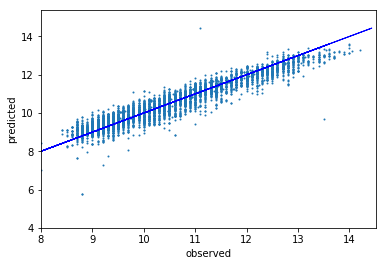

      observed  predicted   residual
2781      11.7  -4.078881  15.778881


In [17]:
# plot observed vs predicted values
plt.figure()

df2.plot.scatter(x='observed', y='predicted', s=1)
plt.xlim(left=8)
plt.ylim(bottom=4)
plt.plot(Y_pred, Y_pred, color='blue', linewidth=1)
plt.show()
print(df2.loc[[2781]])

One prediction actually exists outside of the figure, but it is such a outliner that for clarity we are zoomed in where every other prediction lands. Index 2781 residual between observation and prediction was over 15. It seems that this white wine had over 10 times more sugar than average and most sugar in this dataset. Volatile acidicity was also in the high end of spectrum. I'm surprised that its quality was ranked higher than mean.

In [10]:
print(data.loc[[2781]])
data.describe()

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2781            7.8             0.965          0.6            65.8      0.074   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
2781                  8.0                 160.0  1.03898  3.39       0.69   

      alcohol  quality  
2781     11.7        6  


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


<Figure size 432x288 with 0 Axes>

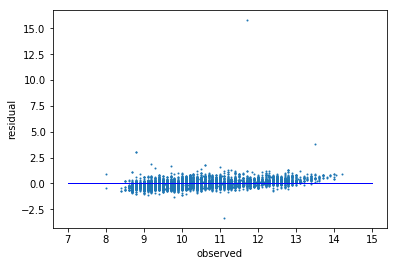

In [11]:
# plot residuals
plt.figure()
df2.plot.scatter(x='observed', y='residual', s=1)
plt.plot([7,15], [0,0], color='blue', linewidth=1)
plt.show()

In [12]:
# normalize variables and rerun MLR analysis to
# estimate variable importance.
scaler = StandardScaler()
dfn = pd.DataFrame(scaler.fit_transform(data))
print(dfn)
Xn = data.iloc[:,:]
Xn = Xn.drop(columns=['alcohol'])
Yn = data.iloc[:,10]
reg2 = linear_model.LinearRegression()
reg2.fit(Xn,Yn)
print("Standardized variables...")
print("Coefficients:" ,reg2.coef_)
print("Intercept:", reg2.intercept_)



            0         1         2         3         4         5         6   \
0     0.172097 -0.081770  0.213280  2.821349 -0.035355  0.569932  0.744565   
1    -0.657501  0.215896  0.048001 -0.944765  0.147747 -1.253019 -0.149685   
2     1.475751  0.017452  0.543838  0.100282  0.193523 -0.312141 -0.973336   
3     0.409125 -0.478657 -0.117278  0.415768  0.559727  0.687541  1.121091   
4     0.409125 -0.478657 -0.117278  0.415768  0.559727  0.687541  1.121091   
5     1.475751  0.017452  0.543838  0.100282  0.193523 -0.312141 -0.973336   
6    -0.776015  0.414339 -1.439511  0.120000 -0.035355 -0.312141 -0.055553   
7     0.172097 -0.081770  0.213280  2.821349 -0.035355  0.569932  0.744565   
8    -0.657501  0.215896  0.048001 -0.944765  0.147747 -1.253019 -0.149685   
9     1.475751 -0.577879  0.791757 -0.964483 -0.081131 -0.429751 -0.220283   
10    1.475751 -0.081770  0.626478 -0.974342 -0.584661 -1.429433 -1.773454   
11    2.068321 -0.478657  0.543838 -0.432100 -0.493110 -1.076604

D:\Anaconda3\envs\koulu-gpu\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda3\envs\koulu-gpu\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Five variables that had most impact on alcohol quantity: 1. Density, 2. Residual sugar, 3.Total sulfur dioxide, 4. Quality, 5. Chlorides.

In [18]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [13]:
Xn.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
quality                   int64
dtype: object

<h3>Validation</h3>

In [14]:
#Splitting training and testing variables
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3281, 11) (3281,)
(1617, 11) (1617,)


In [15]:
#fit a model
reg2 = linear_model.LinearRegression()
model = reg2.fit(X_train,y_train)
predictions = reg2.predict(X_test)
print("Score: ", model.score(X_test, y_test))

Score:  0.9021588523322601


Model seems to be around 90% accurate